In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, firwin, freqz

In [11]:
def plot_db(w, h, cutoff):
    plt.figure(figsize=(10, 6))
    plt.plot(w, 20 * np.log10(abs(h)), label="Resposta em frequência (dB)")
    plt.axvline(cutoff, color='r', linestyle='--', label="Frequência de corte")
    plt.title("Filtro FIR projetado com janela Kaiser")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.legend()
    plt.show()

def plot_amp_samples(taps):
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(taps)), taps)
    plt.title("Coeficientes do Filtro FIR (Taps)")
    plt.xlabel("Amostras (n)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

def plot_amp_rads(w,h):
    # Plotar magnitude em função de W (radianos)
    plt.figure(figsize=(10, 6))
    plt.plot(w, abs(h), label="Magnitude")
    plt.title("Resposta em Frequência (Amplitude vs Frequência Angular)")
    plt.xlabel("Frequência Angular (rad/sample)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()
    plt.show()


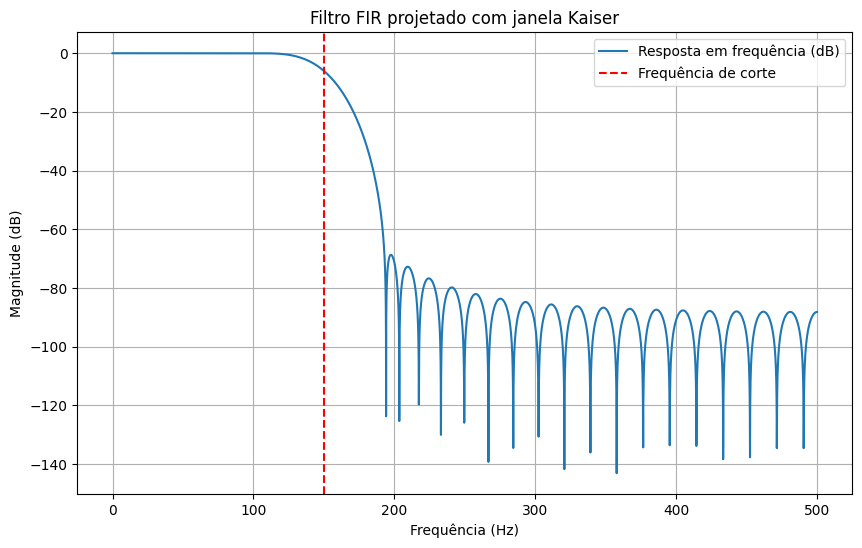

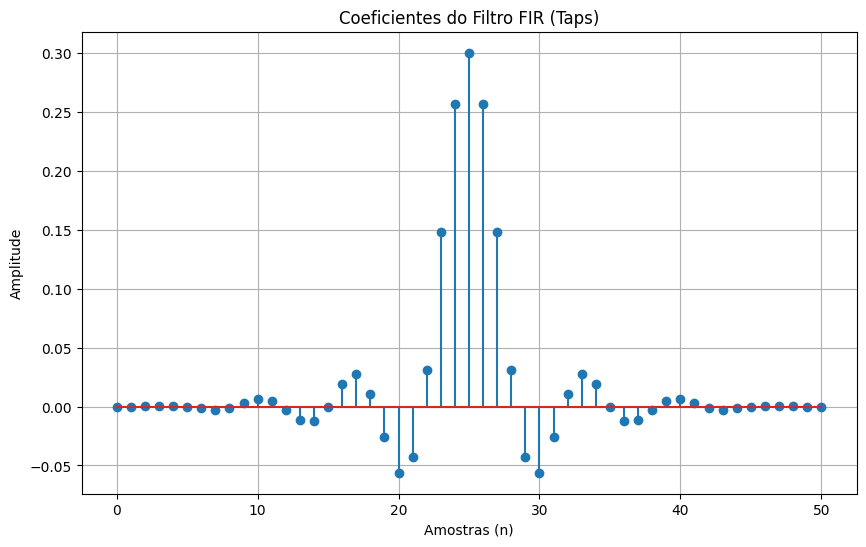

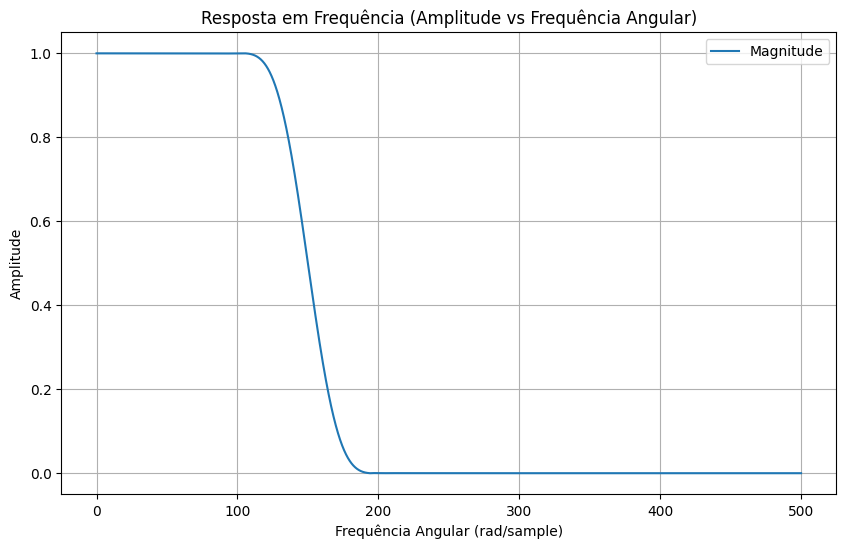

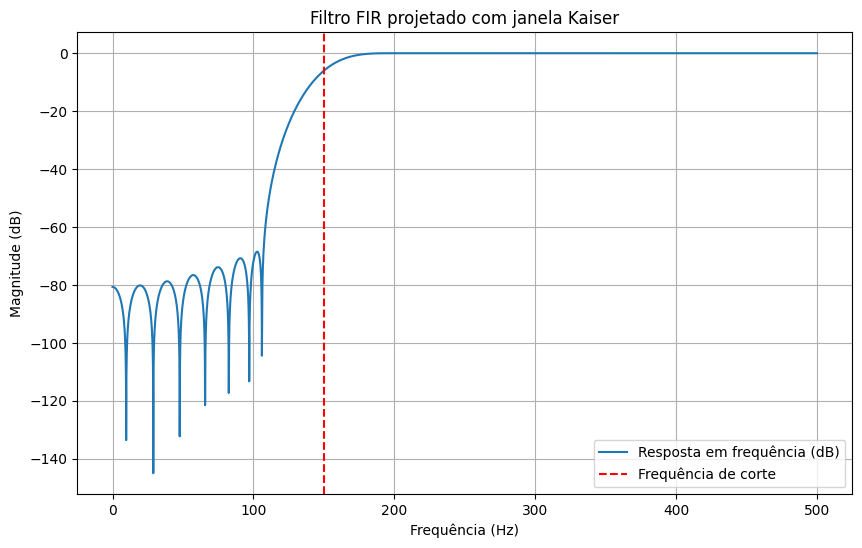

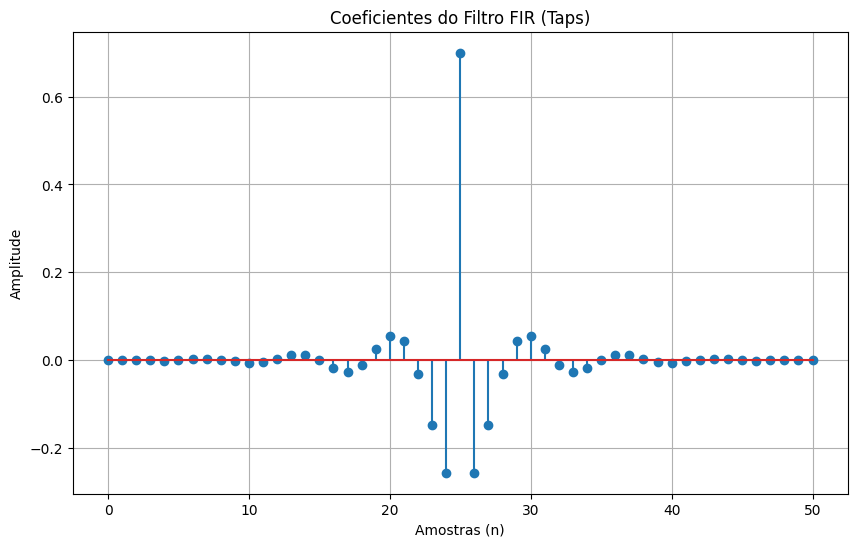

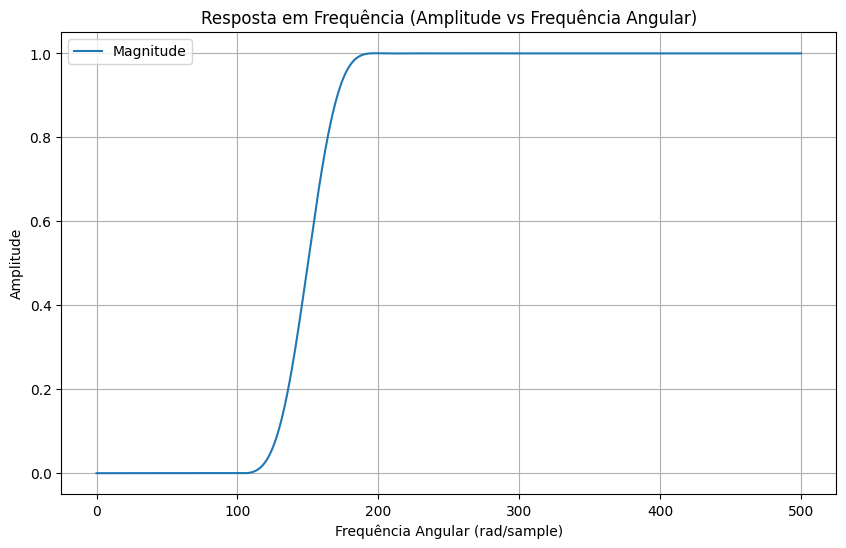

In [12]:
def res(var=True):
    # Parâmetros do filtro
    fs = 1000  # Frequência de amostragem (Hz)
    cutoff = 150  # Frequência de corte (Hz)
    transition_width = 50  # Largura de transição (Hz)
    ripple_db = 70  # Atenuação na banda de rejeição (dB)
    
    # Cálculo da ordem do filtro e parâmetro beta para janela Kaiser
    nyquist = fs / 2
    width = transition_width / nyquist  # Largura normalizada
    #N = int(np.ceil((ripple_db - 7.95) / (2.285 * 2 * np.pi * width)))  # Ordem do filtro
    N = 51
    beta = 0.1102 * (ripple_db - 8.7) if ripple_db > 50 else \
           0.5842 * (ripple_db - 21)**0.4 + 0.07886 * (ripple_db - 21)  # Parâmetro beta
    
    # Gerar os coeficientes FIR usando janela Kaiser
    taps = firwin(N, cutoff / nyquist, window=('kaiser', beta), pass_zero=var)
    
    # Análise de frequência
    w, h = freqz(taps, worN=8000, fs=fs)
    
    plot_db(w,h,cutoff)
    plot_amp_samples(taps)
    plot_amp_rads(w,h)

res()
res(False)